<a href="https://colab.research.google.com/github/intel-analytics/analytics-zoo/blob/master/docs/docs/colab-notebook/chronos/chronos_autots_nyc_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


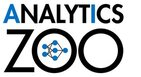
---

##### Copyright 2018 Analytics Zoo Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

## **Environment Preparation**

**Install Analytics Zoo**

You can install the latest pre-release version using `pip install --pre --upgrade analytics-zoo`. 

In [ ]:
# Install latest pre-release version of Analytics Zoo
# Installing Analytics Zoo from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade analytics-zoo[automl]

## **Unsupervised Anomaly Detection using Chronos Anomaly Detector**

In this guide we will demonstrate how to use Chronos Anomaly Detector for automated time seires forecasting.

## **Step 0: Prepare dataset**
For demonstration, we use the publicly available cluster trace data cluster-trace-v2018 of Alibaba Open Cluster Trace Program. You can find the dataset introduction [here](https://github.com/alibaba/clusterdata/blob/master/cluster-trace-v2018/trace_2018.md). In particular, we use machine usage data to demonstrate anomaly detection, you can download the separate data file directly with [machine_usage](http://clusterdata2018pubcn.oss-cn-beijing.aliyuncs.com/machine_usage.tar.gz).

In [86]:
# download the dataset
!wget https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_7578.csv

--2021-06-29 01:53:27--  https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_7578.csv
Resolving child-prc.intel.com (child-prc.intel.com)... 10.239.4.100
Connecting to child-prc.intel.com (child-prc.intel.com)|10.239.4.100|:913... connected.
Proxy request sent, awaiting response... 200 OK
Length: 25928 (25K) [text/plain]
Saving to: ‘speed_7578.csv’

speed_7578.csv      100%[===================>]  25.32K   143KB/s    in 0.2s    

2021-06-29 01:53:29 (143 KB/s) - ‘speed_7578.csv’ saved [25928/25928]



## Step 1: Data Preprocessing

In [87]:
import pandas as pd
df = pd.read_csv("speed_7578.csv", parse_dates=["timestamp"])
df.head()

,timestamp,value
0,2015-09-08 11:39:00,73
1,2015-09-08 11:44:00,62
2,2015-09-08 11:59:00,66
3,2015-09-08 12:19:00,69
4,2015-09-08 12:24:00,65


In [88]:
from zoo.chronos.data import TSDataset

tsdata = TSDataset.from_pandas(df, dt_col="timestamp", target_col="value")
df = tsdata.resample("5min")\
           .impute(mode="linear")\
           .to_pandas()

## AD Usage

In [31]:
import matplotlib.pyplot as plt

In [99]:
from zoo.chronos.model.anomaly import DBScanDetector

ad = DBScanDetector(eps=0.3, min_samples=6)
ad.fit(df['value'].to_numpy())
anomaly_indexes = ad.anomaly_indexes()

## plot

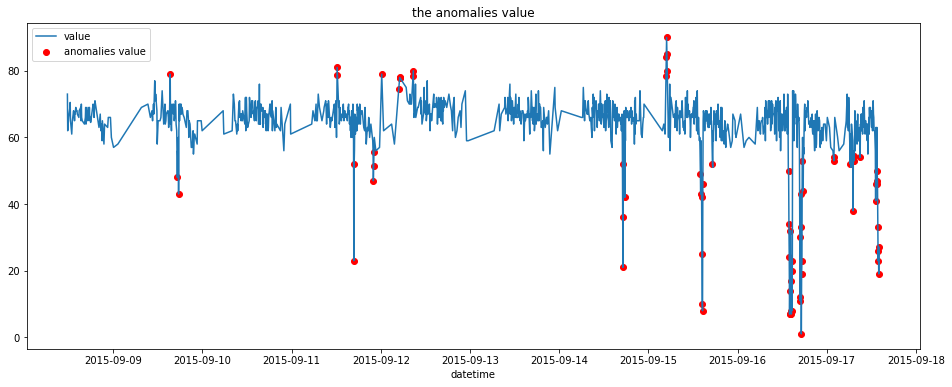

In [101]:
plt.figure(figsize=(16,6))
plt.plot(df.timestamp, df.value, label='value')
plt.scatter(df.timestamp[anomaly_indexes],
            df.value[anomaly_indexes],
            color='red', label='anomalies value')

plt.title('the anomalies value')
plt.xlabel('datetime')
plt.legend(loc='upper left')
plt.show()